# Numerical Methods 1
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman), [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott)

# Lecture 6: Numerical integration

## Learning objectives:

* Be able to compute the integral of a function numerically in 1D
* Understand the concept of order of algorithm and how to impprove accuracy


## Performing numerical integration

*Quadrature* is the term used for numerical evaluation of a definite integral, or put more simply, finding the area under a curve. 

If we have a function $f(x)$ defined between $a$ and $b$, the
[integral](http://en.wikipedia.org/wiki/Integral) is defined as 

\begin{equation}
F\left ( x \right ) = \int_{a}^{b} f\left ( x \right )dx
\end{equation}

and its result is the area under the curve. This operation is an essential part of calculus, being the inverse of differentiation. 

Knowing the value of the area under a curve is important to all kinds of applications. However, many expressions are difficult to integrate analytically, or the function which governs their shape is unknown, and we only have data. Therefore, no course on numerical methods is complete without discussing the different methods of numerical integration. 

A fundamental property of a definite integral is that

\begin{equation}
\int_{a}^{b} f\left ( x \right )dx = \int_{a}^{c} f\left ( x \right )dx + \int_{c}^{b} f\left ( x \right )dx
\end{equation}

where $c$ is a point between $a$ and $b$. 

Therefore, we can equally well perform our integration by splitting the function up into a number of smaller intervals and summing the result of each individual integration over the interval.

If the function is complicated or unknown, we can approximate its value within each of these intervals -- we have now performed a numerical *discretisation* of the function and in this case our associated numerical method to compute the integral is terms a *quadrature* or *numerical integration* method.

As with previous lectures, the choice of approximation method, as well as the size of the intervals, will control the error.  Better methods as well as smaller (i.e. more to cover our total interval of interest: $[a,b]$) sub-intervals will lead to lower errors, but will cost more.

Here the following quadrature methods will be covered in the context of a simple function:

* Midpoint rule
* Trapezoid rule
* Simpson's rule
* Composite Simpson's rule
* Weddle's rule.

## Integration example
Let's begin with a simple function to demonstrate the different methods of numerical integration:

\begin{equation}
f\left ( x \right ) = \sin \left ( x \right ),
\end{equation}

and assume that we want to know what the area under the sin function between 0 and $pi$. 

The integral of $\sin \left ( x \right )$ is $-\cos \left ( x \right )$ (plus a constant which drops out as soon as we perform a *definite* integral), so we can integrate it ourselves by hand to find the true area under the curve:

\begin{equation}
F\left ( x \right ) =  \int_{0}^{\pi} \sin \left ( x \right ) = \left [ -\cos\left ( x \right )+ C \right ]_{0}^{\pi} =-\cos\left ( \pi \right ) + \cos\left ( 0 \right ) = 2.
\end{equation}

Let's start by plotting the function between these points.

Populating the interactive namespace from numpy and matplotlib


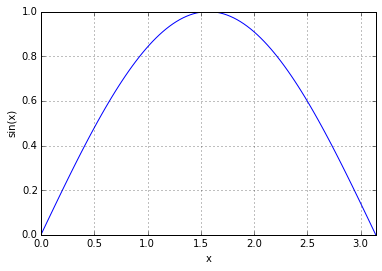

In [3]:
%pylab inline

x = linspace(0,np.pi,100) #Get the value of pi from numpy and generate equally spaced values from 0 to pi
y = sin(x) # calculate sin at these points

plot(x, y)
xlim([0,np.pi]) #Set x axis limits between 0 and pi
xlabel('x');ylabel('sin(x)');grid(True)
show()

Now let's investigate the different quadrature rules, finding the area under the curve and seeing how it differs from the true area which we know is 2.

## Rule 1: Midpoint rule

The *midpoint rule* is the simplest quadrature rule. Note for reasons you will see below it is sometimes also called the *rectangle method*.

Let $h = b - a$ be the length of *one smaller sub-interval* within the larger interval we want to compute the total integral over. 

The midpoint rule, $M$, approximates the integral over this sub-interval by the area of a rectangle, with base of length $h$ and  height of the value of $f(x)$ at the midpoint of that interval (i.e. at $x=(a+b)/2$):

\begin{equation}
M = hf \left ( \frac {a+b} {2} \right )
\end{equation}

Note that is what follows we assume that we have been given the function $f(\cdot)$ such that we can evaluate it anywhere. However, this comes at a cost and so in our quadrature methods we want good accuracy without excessive numbers of function evaluations.

The result of the integration over the entire interval of interest, is then just the sum of the integrals over all the sub-intervals, i.e. the sum of the areas of all the small rectanges. 

A complex example looks like this, where the red line shows the original function we wish to compute the integral of, and the blue rectangles *approximate* the area under that function for a number of sub-intervals:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/340px-Integration_rectangle.svg.png" width="600">

Clearly the sum of the areas of all the rectanges provides an estimate of the true integral.

[Note that the SciPy module features many different integration functions, and you can find thorough documentation for these functions (including methods not covered in this course) [here](http://docs.scipy.org/doc/scipy/reference/integrate.html). This library does not contain a function for the midpoint rule but it is trivial to create our own.]

In [8]:
def midpoint_rule(start_point, end_point, function, number_of_bins=10):
    # First, check how big each bin needs to be. Bin is just another word for rectangle.
    bin_size = float(end_point - start_point)/number_of_bins
    
    # To make sure our midpoint rule function works as expected and doesn't output garbage accidentally,
    # let's assert that there are more than 0 bins, and that the number of bins is a whole number
    assert bin_size > 0
    assert type(number_of_bins) == int
    # By doing this, the function will give an error if either of these are not true,
    # avoiding problems later. This is a neat alternative to a try-except loop.
    # In programming it is always good to know more than one way of doing things!
    
    # Create the variable to contain the sum of all the areas
    running_total = 0.0
    # Find the first midpoint - the centre point of the base of the rectangle
    mid = start_point + (bin_size/2.0)
    
    # Loop to create each rectangle 
    while (mid < end_point):
        # Find the area of the current rectangle and add it to the running total
        running_total += bin_size * function(mid)  # this involves an evaluation of the function at the sub-interval midpoint
        # Move the midpoint up to the next centre of the bin
        mid += bin_size
    
    # Return our running total result
    return running_total

Now let's test the midpoint function. 

In [9]:
print "The exact area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = midpoint_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 3.14159 (error=1.14159)
Area 2 rectangle(s) = 2.22144 (error=0.221441)
Area 10 rectangle(s) = 2.00825 (error=0.00824841)
Area 100 rectangle(s) = 2.00008 (error=8.22491e-05)
Area 1000 rectangle(s) = 2 (error=8.22467e-07)


With one rectangle, we are simply finding the area of a box of shape $\pi \times$ 1 ($\pi$ is the width of the rectangle and $1$ is the value of the function evaluated at the midpoint $\pi/2$), so of course the result is $\pi$. 

As we increase the number of sub-intervals, or rectangles, we split the function up by, we increase the accuracy of our area.

<span style="color:blue">Exercise:  Based on how the error decreases as we increase the number of rectangles (from 10 to 100 to 1000), what can you estimate as the order of accuracy of this method?</span>

The simplicity of this method is its weakness, as rectangles are rarely a good approximation for the shape of a smooth function. 

We want to use as few shapes as possible to approximate our function, because each additional rectangle is one extra time round the loop, which includes its own operations in addition to additional evaluations of the function, hence increases the overall processing time. 

Instead, let's try another shape that follows the profile a little better ...

## Rule 2: Trapezoid rule

If we change the shape of the rectangle for a trapezoid (the top of the shape is now a linear line approximating the shape of the function, rather than the constant used in the midpoint rule), we arrive at the trapezoid, or trapezoidal, rule. 

The trapezoid rule approximates the integral by the area of a trapezoid with base $h$ and the left- and right-hand-sides equal to the vaules of the function at the two end points.  In this case the area of the shape, $T$, approximating the integral over one sub-interval, is given by

\begin{equation}
T = h \left( \frac {f\left ( a\right ) + f \left (b \right )} {2} \right)
\end{equation}

For our pictorial example used above the approximation looks like it should be more accurate than the midpoint rule:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/340px-Integration_trapezoid.svg.png" width="600">

the tops of the shapes (now trapezoids) are approximating the variation of the function with a linear function, rather than a flat (constant) function.  This looks like it should give more accurate results, but see below.

[Note that numpy has a function for the trapezoid rule, <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html">numpy.trapz</a>, but we'll make our own that works in a similar way to our midpoint rule function.]

## <span style="color:blue">Exercise 6.1: Complete the implementation of the trapezoid rule below</span>

In [13]:
def trapezoid_rule(start_point, end_point, function, number_of_bins=10):
    
    bin_size = float(end_point - start_point)/number_of_bins
    
    assert bin_size > 0
    assert type(number_of_bins) == int
    
    running_total = 0.0
    
    # Loop to create each trapezoid 
    for i in range(number_of_bins):   # note this function takes a slightly different approach to achieve the same thing as above
        # Set the start of this bin
        this_bin_start = start_point + (bin_size * i)
        # Find the area of the current trapezoid and add it to the running total
        running_total += bin_size*float( function(this_bin_start)+function(this_bin_start+bin_size) )/2.0
        
    #Return our running total result
    return running_total

and test the function in a similar way:

In [14]:
print "The exact area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = trapezoid_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 1.92367e-16 (error=2)
Area 2 rectangle(s) = 1.5708 (error=0.429204)
Area 10 rectangle(s) = 1.98352 (error=0.0164765)
Area 100 rectangle(s) = 1.99984 (error=0.000164496)
Area 1000 rectangle(s) = 2 (error=1.64493e-06)


You should have found the following errors:

`The area found by direct integration = 2`

`Area 1 rectangle(s) = 1.92367e-16 (error=2)`

`Area 2 rectangle(s) = 1.5708 (error=0.429204)`

`Area 10 rectangle(s) = 1.98352 (error=0.0164765)`

`Area 100 rectangle(s) = 1.99984 (error=0.000164496)`

`Area 1000 rectangle(s) = 2 (error=1.64493e-06)`

## Error analysis

We can see a few differences compared to the midpoint rule. 

In this particular case of half a sine wave, the trapezoid rule always *under-estimates* the area, whereas the midpoint rule *over-estimates*. The result for finding the integral of $\sin$ with only one triangle is very small, because that trapezoid has almost no height. 

Perhaps most surprisingly, the midpoint rule is more accurate than the trapezoid rule - this is not obvious from the discussions and the images above.

The accuracy of a quadrature rule is predicted by examining its behaviour in practice with *polynomials*. The order of a rule is the degree of the lowest degree polynomial that the rule does *not* integrate exactly. 

If a quadrature rule of order $p$ is used to integrate a smooth function over an interval of size $h$, then Taylor series analysis shows the error is proportional to $h^p$. 

Both the midpoint and trapezoid rules are exact for constant and linear functions, but are not exact for quadratics. Therefore, they have order two (as we saw above in terms of how their errors reduced with smaller $h$). 

<span style="color:blue">Exercise:  It's obvious why this is the case for the trapezoid rule, but why is it the case for the simpler midpoint rule?</span>

For the "concave-down" (half of a sine wave) function we chose above notice that the trapezidal rule will consistently underestimate the area under the curve. While the mid-point rule will have parts of each rectangle above and below the curve, hence to a certain extent the errors will cancel each other out. This is why for this example the errors in the mid-point rule turn out to be approximately half those in the trapezoidal rule.  While this turns out to be *generally* true for smooth functions, we can always come up with (counter) examples where the trapezoid rule will win (can you think of an example?).

Taylor series analysis can be used (like last week for derivative approximation) to formally construct upper bounds on the quadrature error for both methods, but for us it will be sufficient to just consider an example.  We know analytically that

\begin{equation}
\int_{0}^{1} x^{2}dx = \left.\frac{1}{3}x^3\right|_0^1=\frac {1}{3}
\end{equation}

Numerically, the midpoint rule gives

\begin{equation}
M = 1 \left(\frac {1}{2}\right)^{2} = \frac {1}{4}
\end{equation}

while the trapezoid rule gives

\begin{equation}
T = 1 \frac {0+1^{2}}{2} = \frac {1}{2}
\end{equation}

The error for $M$ is 1/12, while the error for $T$ is -1/6. Therefore, the midpoint rule is twice as accurate as the trapezoid rule.  This is the case for this simple example, and we see from the errors numbers printed above that it is approximately true also for the sine case.


### Rule 3: Simpson's rule

Knowing the error estimates from the two rules explored so far allows us to combine them to create a new quadrature rule, more accurate than either one separately. 

Suppose $S$ indicates an unknown, but more accurate, estimate of the integral over an interval.  Then from above as $T$ has an error  approximately -2 times the error in $M$, the following relation must hold approximately:

\begin{equation}
S-T \approx -2 \left ( S-M\right )
\end{equation}

We can solve this for $S$ in order to provide a more accurate estimate of the integral:

\begin{equation}
S = \frac{2}{3}M + \frac{1}{3}T
\end{equation}

This estimate is usually more accurate than either $M$ or $T$ alone. 

The resulting quadrature method is known as [Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule). 

An alternate derivation of the same rule involves fitting a *quadratic function* (rather than the constant and linear already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation.

In both cases you arrive at the rule:

\begin{equation}
S = \frac{h}{6}\left ( f \left ( a\right ) + 4f \left ( c\right ) + f\left ( b\right )\right )
\end{equation}

This expression now integrates up to cubics exactly, so it is of order 4. 

It looks like a much closer fit to the function:

<img src="http://upload.wikimedia.org/wikipedia/commons/5/50/Integration_simpson.png" width="600">

Let's make a function to test it out...

## <span style="color:blue">Exercise 6.2: Complete an implementation of Simpson's rule and test it on our sine function</span>

In [15]:
def simpsons_rule(start_point, end_point, function, number_of_bins=10):
    
    bin_size = float(end_point - start_point)/number_of_bins
    
    assert bin_size > 0
    assert type(number_of_bins) == int
    
    running_total = 0.0
    
    #Loop to create each shape 
    for i in range(number_of_bins):
        #Find a, c, and b
        this_bin_start = start_point + bin_size * (i)
        this_bin_mid = this_bin_start + bin_size/2
        this_bin_end = this_bin_start + bin_size
        #Calculate the rule and add to running total.
        running_total += (bin_size/6)*float(function(this_bin_start)+4*function(this_bin_mid)+function(this_bin_end))
        
    #Return our running total result
    return running_total

In [21]:
print "The area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = simpsons_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 2.0944 (error=0.0943951)
Area 2 rectangle(s) = 2.00456 (error=0.00455975)
Area 20 rectangle(s) = 2 (error=4.23093e-07)
Area 200 rectangle(s) = 2 (error=4.228e-11)
Area 2000 rectangle(s) = 2 (error=2.22045e-15)


For this simple function you should find far smaller errors, and which drop much more rapidly with smaller $h$ (or more sub-intervals).


## Rule 4: Composite Simpson's Rule

Let's take our calculations another step further. 

Previously, we have considered $a$ at the start of the interval, and $b$ at the end, with $c$ at the mid point. 

Instead, let's consider [a,c] and [c,b] as two intervals and split them up into even smaller subintervals, by making $d$ and $e$ the midpoints of these subintervals, where clerly $d = \left ( a+c\right )/2$, and $e = \left( c+b\right )/2$. 

If we apply Simpson's rule to each of the smaller subintervals, we obtain a rule over the larger $\left[a,b\right]$ that now takes the form:
 
\begin{equation}
S_2 = \frac{h}{12}\left ( f \left ( a\right ) + 4f \left ( d\right ) + 2f\left ( c\right ) + 4f \left ( e\right ) + f \left ( b\right )\right )
\end{equation}

This provides the same result as applying the standard Simpson's rule over the two intervals and summing, but notice that we have saved an evaluation of $f(c)$.

This is known as the [Composite Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule#Composite_Simpson.27s_rule), an example of a *composite* quadrature rule as it is a method that subdivides each interval. 

We finally don't need to write our own function, as scipy includes a function for the Composite Simpson's rule, [simps](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html). Since we have written functions above, let's make another one so we know it works in the same way as the others, so we can be sure our results are comparable.

In [4]:
def simpsons_composite_rule(start_point, end_point, function, number_of_bins=10):
    
    bin_size = float(end_point - start_point)/number_of_bins
    
    assert bin_size > 0
    assert type(number_of_bins) == int
    
    running_total = 0.0
    
    #Loop to create each shape 
    for i in range(number_of_bins):
        #Find a, d, c, e, and b
        this_bin_start = start_point + bin_size * (i)
        this_bin_quarter = this_bin_start + bin_size*1./4
        this_bin_mid = this_bin_start + bin_size*2./4
        this_bin_three_quarter = this_bin_start + bin_size*3./4
        this_bin_end = this_bin_start + bin_size
        #Calculate the rule and add to running total. 
        running_total += (bin_size/12)*float(function(this_bin_start)+4*function(this_bin_quarter)+2*function(this_bin_mid)+4*function(this_bin_three_quarter)+function(this_bin_end))
        
    #Return our running total result
    return running_total

In [5]:
print "The area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = simpsons_composite_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 2.00456 (error=0.00455975)
Area 2 rectangle(s) = 2.00027 (error=0.00026917)
Area 10 rectangle(s) = 2 (error=4.23093e-07)
Area 100 rectangle(s) = 2 (error=4.22791e-11)
Area 1000 rectangle(s) = 2 (error=6.21725e-15)


This is a slight improvement for a simple function like $\sin$, but will be much more of an improvement for functions which oscillate more, in a relative sense comapred to the size of our bins. 

## Rule 5: Weddle's rule

Now we are on our final rule... 

Given that $S$ and $S_2$ approximate the same integral, their difference can be used to estimate the error:

\begin{equation}
E = \left ( S_2 - S \right)
\end{equation}

Therefore, we can combine these rules to make an *even more* accurate approximation. 

Both of the rules are of *order four*, but the $S_2$ interval size is effectively half the $S$ step size, so we would expect $S_2$ to be roughly $2^4=16$ times as accurate. Let's call this super accurate rule $Q$, and we can find it by solving:

\begin{equation}
Q - S = 16 \left ( Q - S_2 \right )
\end{equation}

resulting in:

\begin{equation}
Q = S_2 + \frac {\left (S_2 - S \right )}{15} 
\end{equation}

This is known as Weddle's rule or the extrapolated Simpson's rule, because it uses two different values of $h$ and *extrapolates* towards $h = 0$. 

Making a function of this is easy as we just call our other two Simpson functions.

In [10]:
def weddles_rule(start_point, end_point, function, number_of_bins=10):
    result_simpson = simpsons_rule(start_point, end_point, function, number_of_bins)
    result_composite = simpsons_composite_rule(start_point, end_point, function, number_of_bins)
    
    return result_composite + float(result_composite - result_simpson)/15

In [18]:
print "The area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = weddles_rule(0, np.pi, sin, i)
    print "Area with %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area with 1 rectangle(s) = 1.99857 (error=0.00142927)
Area with 2 rectangle(s) = 1.99998 (error=1.68691e-05)
Area with 10 rectangle(s) = 2 (error=9.96725e-10)
Area with 100 rectangle(s) = 2 (error=4.44089e-16)
Area with 1000 rectangle(s) = 2 (error=2.22045e-15)


You can see our final rule is much more accurate for fewer required bins. Indeed we are down at the limits where round-off errors are affecting our results.

## Aside: (Richardson) extrapolation, Romberg integration and Newton-Cotes formulae

Note that the above technique of using the same rule, but with different values for $h$, to derive a more accurate estimate of the integral is an example of what is more generally called Richardson extrapolation.  

Performing this approach using the trapezoid rule as the starting point leads to what is termed *Romberg integration*.